https://www.tandfonline.com/doi/abs/10.13182/FST95-A30485

## Model for Tritium Extraction from Pb-17Li by Bubble Columns

In [4]:
"""
Bubble Column Gas-Liquid Contactor Model Runner

This script configures and runs a bubble column Pb-17Li gas-liquid contactor simulation of Tritium extraction,
using specified operating parameters and boundary conditions.
"""

# import bubble_col_glc
import pathsim_chem.tritium.glc as bubble_col_glc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Operating Parameters
# ------------------
# Input parameters for liquid phase
c_T_in = 1.96e-2  # mol/m^3 (c_T(L+)), Inlet tritium concentration in liquid

# Input parameters for gas phase
y_T2_in = 0  # Inlet tritium molar fraction in gas (0 = pure purge gas)

# Physical parameters
P_in = 5e5        # Pa, Total pressure at gas inlet / liquid outlet
L = 3            # m, Height of the bubble column
D = 0.5          # m, Column diameter
flow_l = 560     # kg/s, Liquid mass flow rate
flow_g = 0.19    # mol/s, Gas molar flow rate
T = 623          # K, Temperature

# Solver parameters
BCs = "C-C"      # Boundary conditions: "O-C" (Open-Closed) or "C-C" (Closed-Closed)
elements = 50    # Number of initial mesh elements for solver

# Package parameters for solver
params = {
    "c_T_in": c_T_in,
    "y_T2_in": y_T2_in,
    "P_in": P_in,
    "BCs": BCs,
    "L": L,
    "D": D,
    "flow_l": flow_l,
    "flow_g": flow_g,
    "T": T,
    "elements": elements,
}

# Run simulation
[results, solution] = bubble_col_glc.solve(params)

# Print results
for key, value in results.items():
    print(f"{key}: {value}")



# --- Rebuild parameters for visualization ---

# Extract necessary parameters from results for plotting
dimensionless_params = {
    'psi': results['psi'],
}
u_g0 = results['u_g0']
u_l = results['u_l']


# --- Visualization of Results ---

# Prep text for annotation box
params_text = (
    f"c_T_inlet: {c_T_in:.2e} [mol/m^3]\n"
    f"y_T2_in: {y_T2_in:.2e}\n"
    f"P_0: {P_in:.2e} [Pa]\n"
    f"Flow_l: {flow_l:.2e} [kg/s]\n"
    f"Flow_g: {flow_g:.2e} [mol/s]\n"
    f"T: {T} [K]\n"
    f"BCs: {BCs}"
)

c_T_in:  0.0196
y_T2_in : 0
flow_l:  560
flow_g:  0.19
Total tritium in [mol/s]: 0.0011674318445317312
Total tritium out [mol/s]: 0.0011674318445317312
tritium_out_liquid [mol/s]: 0.00106303256255848
tritium_out_gas [mol/s]: 0.00010439928197325123
extraction_efficiency [fraction]: 0.08945528420023907
c_T_outlet [mol/m^3]: 0.017846676429675315
P_T2_inlet_gas [Pa]: 0.0
P_T2_outlet_gas [Pa]: 64.41703846507923
y_T2_outlet_gas: 0.0002747262488248567
total_gas_P_inlet [Pa]: 500000.0
total_gas_P_outlet [Pa]: 234477.18862185001
liquid_vol_flow [m^3/s]: 0.05956284921080261
gas_vol_flow_outlet [m^3/s]: 0.004197350479572779
rho_l: 9401.83365
sigma_l: 0.45147000000000004
mu_l: 0.00176914527844913
nu_l: 1.881702383076231e-07
K_s: 0.0009707892957239487
Q_l: 0.05956284921080261
Q_g: 0.001968365880221598
u_l: 0.3033511000491659
u_g0: 0.010024805108822301
epsilon_g: 0.04005280332459472
epsilon_l: 0.9599471966754053
E_l: 0.09254361716554736
E_g: 0.0005012402554411151
a: 92.10476976009137
h_l: 0.00015826

In [2]:
import morethemes as mt
mt.set_theme("lighter")

/tmp/ipykernel_816815/4292028969.py:20: UserWarning: Glyph 958 (\N{GREEK SMALL LETTER XI}) missing from font(s) Outfit.
  fig1.tight_layout()
/home/vk9746/miniforge3/envs/fuel-cycle-paper/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 958 (\N{GREEK SMALL LETTER XI}) missing from font(s) Outfit.
  fig.canvas.print_figure(bytes_io, **kw)


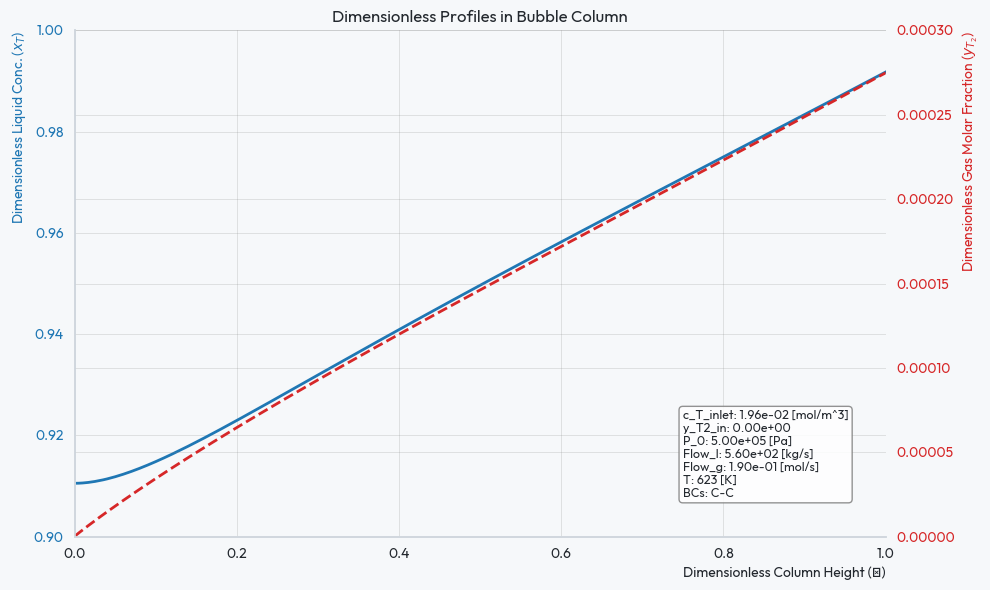

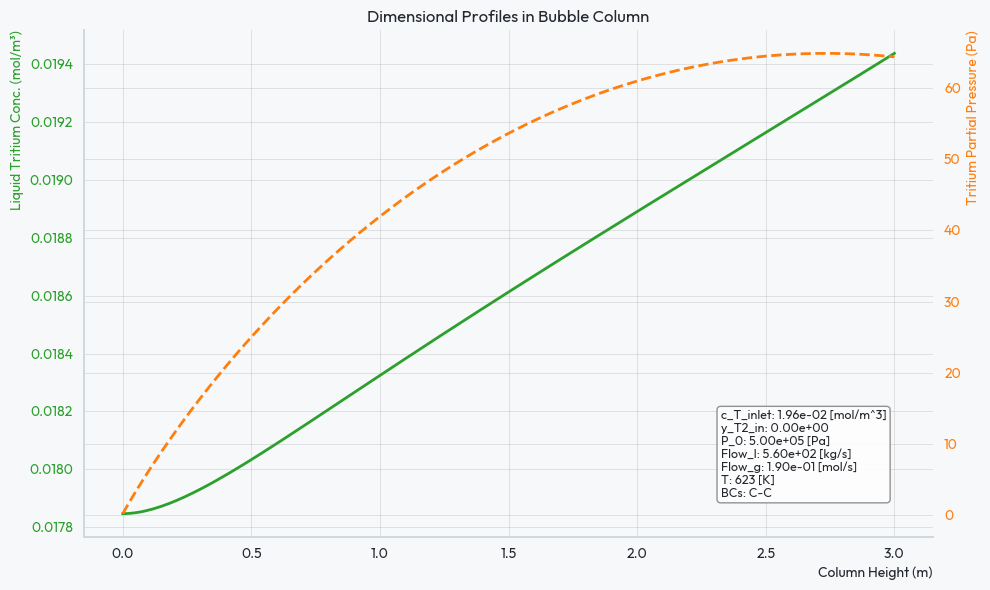

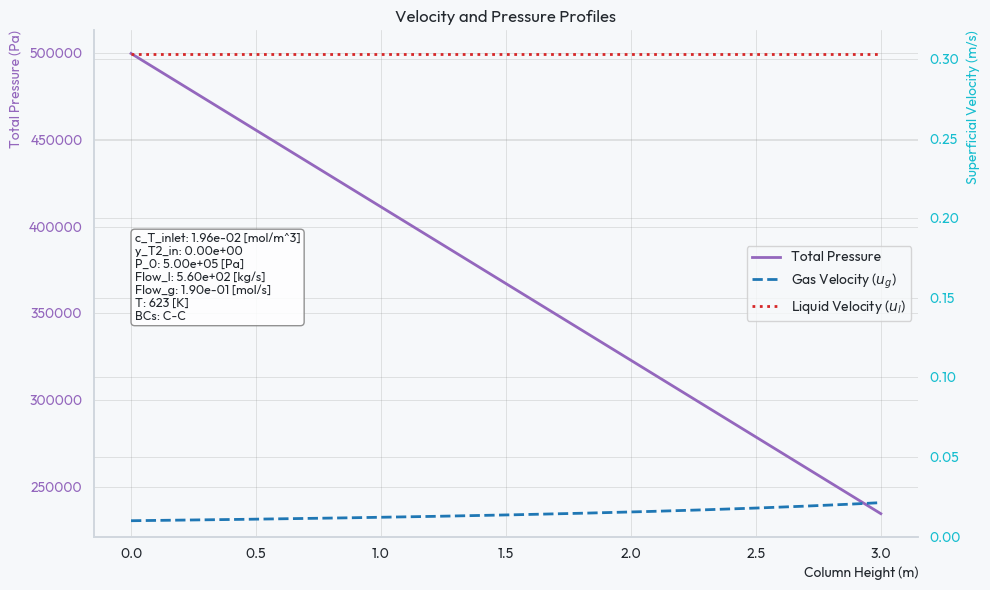

In [6]:

# --- Plot 1: Dimensionless Profiles ---
fig1, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Dimensionless Column Height (ξ)')
ax1.set_ylabel('Dimensionless Liquid Conc. ($x_T$)', color=color)
ax1.plot(solution.x, solution.y[0], label='$x_T$ (Liquid)', color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0.9, top=1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Dimensionless Gas Molar Fraction ($y_{T_2}$)', color=color)
ax2.plot(solution.x, solution.y[2], label='$y_{T_2}$ (Gas)', color=color, ls='--', lw=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=3e-4)
ax2.set_xlim(left=0, right=1)

plt.title('Dimensionless Profiles in Bubble Column')
fig1.tight_layout()

# Add annotation box including input parameters
ax = plt.gca()
ax.text(
    0.75, 0.25, params_text,
    transform=ax.transAxes, fontsize=9, va='top', ha='left',
    bbox=dict(facecolor='white', alpha=0.85, edgecolor='gray', boxstyle='round')
)
plt.show()
        
# --- Plot 2: Dimensional Profiles ---
# Calculate dimensional profiles along the column
c_T_profile = solution.y[0] * c_T_in
P_total_profile = P_in * (1 - dimensionless_params['psi'] * solution.x)
P_T2_profile = solution.y[2] * P_total_profile
col_height = solution.x * L
        
fig2, ax3 = plt.subplots(figsize=(10, 6))

color = 'tab:green'
ax3.set_xlabel('Column Height (m)')
ax3.set_ylabel('Liquid Tritium Conc. (mol/m³)', color=color)
ax3.plot(col_height, c_T_profile, label='Liquid Conc.', color=color, lw=2)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
color = 'tab:orange'
ax4.set_ylabel('Tritium Partial Pressure (Pa)', color=color)
ax4.plot(col_height, P_T2_profile, label='Tritium Pressure', color=color, ls='--', lw=2)
ax4.tick_params(axis='y', labelcolor=color)

plt.title('Dimensional Profiles in Bubble Column')
fig2.tight_layout()

# Add annotation box including input parameters
ax = plt.gca()
ax.text(
    0.75, 0.25, params_text,
    transform=ax.transAxes, fontsize=9, va='top', ha='left',
    bbox=dict(facecolor='white', alpha=0.85, edgecolor='gray', boxstyle='round')
)
plt.show()

# --- Plot 3: Velocity and Pressure Profiles ---
# Calculate velocity and pressure profiles
u_g_profile = u_g0 / (1 - dimensionless_params['psi'] * solution.x)
u_l_profile = np.full_like(col_height, u_l)
# P_total_profile is already calculated for Plot 2

fig3, ax5 = plt.subplots(figsize=(10, 6))

color = 'tab:purple'
ax5.set_xlabel('Column Height (m)')
ax5.set_ylabel('Total Pressure (Pa)', color=color)
ax5.plot(col_height, P_total_profile, label='Total Pressure', color=color, lw=2)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax5.twinx()
color = 'tab:cyan'
ax6.set_ylabel('Superficial Velocity (m/s)', color=color)
ax6.plot(col_height, u_g_profile, label='Gas Velocity ($u_g$)', color='tab:blue', ls='--', lw=2)
ax6.plot(col_height, u_l_profile, label='Liquid Velocity ($u_l$)', color='tab:red', ls=':', lw=2)
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_ylim(bottom=0)

plt.title('Velocity and Pressure Profiles')
# Combine legends from both y-axes
lines, labels = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax6.legend(lines + lines2, labels + labels2, loc='best')
fig3.tight_layout()

# Add annotation box including input parameters
ax = plt.gca()
ax.text(
    0.05, 0.6, params_text,
    transform=ax.transAxes, fontsize=9, va='top', ha='left',
    bbox=dict(facecolor='white', alpha=0.85, edgecolor='gray', boxstyle='round')
)
plt.show()


# Compare with results from Mohan paper

c_T_in:  0.0196
y_T2_in : 0
flow_l:  560
flow_g:  0.19
Plot saved to: ./plots/glc_mohan_comparison_C-C_Fig3.pdf
c_T_in:  0.0196
y_T2_in : 0
flow_l:  560
flow_g:  0.19
Plot saved to: ./plots/glc_mohan_comparison_O-C_Fig3.pdf


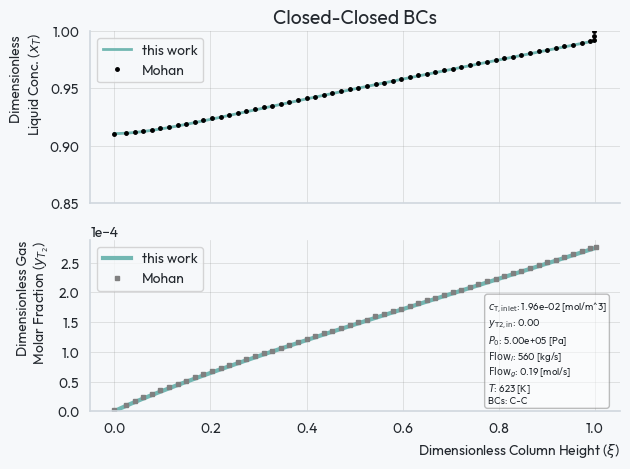

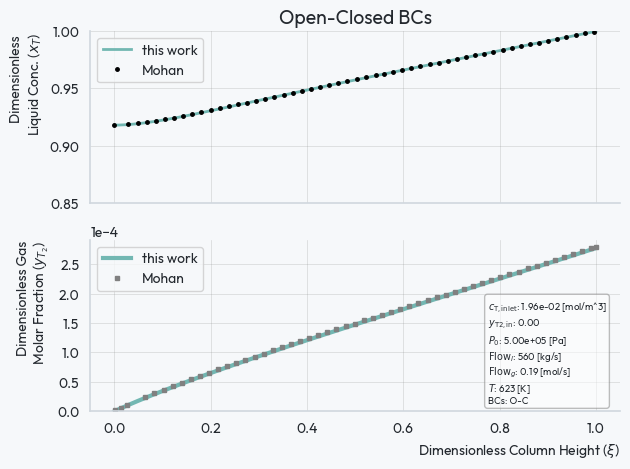

In [21]:
import os
# The Mohan paper uses parameters:

# c_T_inlet = 1.96e-2  # mol/m^3 (c_T(L+)), Inlet tritium concentration in liquid
# y_T2_in = 0      # Inlet tritium molar fraction in gas (0 = pure purge gas)
# P_0 = 5e5        # Pa, Total pressure at gas inlet / liquid outlet
# L = 3            # m, Height of the bubble column
# D = 0.5          # m, Column diameter
# Flow_l = 560     # kg/s, Liquid mass flow rate
# Flow_g = 0.19    # mol/s, Gas molar flow rate
# T = 623          # K, Temperature

for BCs in ["C-C", "O-C"]:
    new_params = params.copy()
    new_params["BCs"] = BCs
    # Run simulation
    [results, solution] = bubble_col_glc.solve(new_params)

    # --- Import Mohan paper results for comparison ---
    if BCs == "C-C":
        Mohan_xT = pd.read_csv('Mohan_results/Mohan_CC_xT.csv')
        Mohan_yT2 = pd.read_csv('Mohan_results/Mohan_CC_yT2.csv')
    elif BCs == "O-C":
        Mohan_xT = pd.read_csv('Mohan_results/Mohan_OC_xT.csv')
        Mohan_yT2 = pd.read_csv('Mohan_results/Mohan_OC_yT2.csv')
    # --- Plot comparison of our model vs Mohan paper dimensionless results ---

    fig1, axs = plt.subplots(nrows=2, sharex=True)

    axs[0].set_ylabel('Dimensionless \nLiquid Conc. ($x_T$)')
    axs[0].plot(solution.x, solution.y[0], label='this work', lw=2)
    axs[0].tick_params(axis='y')
    axs[0].set_ylim(bottom=0.85, top=1)

    axs[1].set_xlabel('Dimensionless Column Height ($\\xi$)')
    axs[1].set_ylabel('Dimensionless Gas\n Molar Fraction ($y_{T_2}$)')
    axs[1].plot(solution.x, solution.y[2], label='this work', lw=3)
    axs[1].tick_params(axis='y')
    axs[1].set_ylim(bottom=0)
    # plot Mohan xT on primary axis
    step_mohan = 1  # Plot every 2nd point for clarity
    axs[0].plot(Mohan_xT.iloc[:,0][::step_mohan], Mohan_xT.iloc[:,1][::step_mohan], label='Mohan', color='black', marker='o', ls='None', ms=2.5)
    # plot Mohan yT2 on secondary axis
    axs[1].plot(Mohan_yT2.iloc[:,0][::step_mohan], Mohan_yT2.iloc[:,1][::step_mohan], label='Mohan', color='gray', marker='s', ls='None', ms=2.5)

    # set axs[1] yticks format as scientific
    axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    # --- Combined legend from both axes ---
    axs[0].legend()
    axs[1].legend()
    # h1, l1 = axs[0].get_legend_handles_labels()
    # h2, l2 = axs[1].get_legend_handles_labels()
    # axs[0].legend(h1 + h2, l1 + l2, loc='best', ncol=1, framealpha=0.9)
    if BCs == "C-C":
        axs[0].set_title('Closed-Closed BCs', fontsize=14)
    elif BCs == "O-C":  
        axs[0].set_title('Open-Closed BCs', fontsize=14)

    fig1.tight_layout()

    # Add annotation box
    c_T_inlet = new_params.get("c_T_in")
    y_T2_in = new_params.get("y_T2_in")
    P_0 = new_params.get("P_in")
    Flow_l = new_params.get("flow_l")
    Flow_g = new_params.get("flow_g")
    T = new_params.get("T")
    BCs = new_params.get("BCs")

    param_text = (
        f"$c_\\mathrm{{T,inlet}}$: {c_T_inlet:.2e} [mol/m^3]\n"
        f"$y_\\mathrm{{T2,in}}$: {y_T2_in:.2f}\n"
        f"$P_0$: {P_0:.2e} [Pa]\n"
        f"$\\mathrm{{Flow}}_l$: {Flow_l:.0f} [kg/s]\n"
        f"$\\mathrm{{Flow}}_g$: {Flow_g:.2f} [mol/s]\n"
        f"$T$: {T} [K]\n"
        f"BCs: {BCs}"
    )

    ax = plt.gca()
    ax.text(
        0.75, 0.65, param_text,
        transform=ax.transAxes, fontsize=7, va='top', ha='left',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray', boxstyle='round')
    )

    plots_dir = './plots'
    os.makedirs(plots_dir, exist_ok=True)
    pdf_filename = f'glc_mohan_comparison_{BCs}_Fig3.pdf'
    pdf_path = os.path.join(plots_dir, pdf_filename)
    plt.savefig(pdf_path, bbox_inches='tight')
    print(f"Plot saved to: {pdf_path}")
